In [1]:
import numpy
import pandas
import sklearn
import matplotlib
import seaborn
import phik
import ydata_profiling
import scipy

print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("scikit-learn:", sklearn.__version__)

C:\Users\rebec\anaconda3\envs\projeto_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NumPy: 1.23.5
Pandas: 1.5.3
scikit-learn: 1.1.3


In [2]:
import sys
print(sys.executable)

C:\Users\rebec\anaconda3\envs\projeto_env\python.exe


In [3]:
import pandas_profiling
from pandas_profiling import ProfileReport
print(ProfileReport)

<class 'ydata_profiling.profile_report.ProfileReport'>


C:\Users\rebec\AppData\Local\Temp\ipykernel_15736\1806125524.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
import sys
print(sys.executable)

C:\Users\rebec\anaconda3\envs\projeto_env\python.exe


In [5]:
import pandas as pd
print(pd.__version__)

1.5.3


In [6]:
#Install package to import dataset in excel file
!pip install openpyxl

In [7]:
#IMPORT LIBRARIES
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime as dt
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from itertools import product
from math import ceil
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
from pandas_profiling import ProfileReport 
%config InlineBackend.figure_format = 'retina' 
from scipy.stats import iqr as IQR
from collections import Counter

from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
import phik
import matplotlib.cm as cm
from sklearn.manifold import TSNE

#outliers detection
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier

from os.path import join


from sklearn.metrics import pairwise_distances

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Seeting seaborn style
sns.set()

In [8]:
#import dataset
df = pd.read_csv(r'C:\Users\rebec\Downloads\data.csv\data.csv', encoding='latin1')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
# First look at the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
#first look at dataframe
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [11]:
# Data types and null values verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
# Replace possible empty values with NaN
df.replace("", np.nan, inplace=True)

# Function to show missing values and their percentages
def missing_data(df):
    l = []
    for col in df.columns:
        missing = df[col].isnull().sum(axis=0)
        percentage = missing/df.shape[0]
        l.append([col,missing,percentage*100])
        df_missing = pd.DataFrame(l, columns = ['Feature','missing','percentage'])
        df_missing = df_missing.sort_values('missing',axis=0, ascending = False)    
    return df_missing

In [13]:
# Check the percentage of missing values
df_missing = missing_data(df)
df_missing = df_missing[df_missing['missing']>0]
df_missing

,Feature,missing,percentage
6,CustomerID,135080,24.926694
2,Description,1454,0.268311


In [14]:
#removing the null from feature description as <1%
df.dropna(subset=['Description'], inplace= True)

In [15]:
df['Description'].isnull().sum()

0

In [16]:
# Define non-metric features
non_metric_features = ['InvoiceNo','StockCode','Description','InvoiceDate','CustomerID','Country']

#make a df copy
df1=df.copy()

# Define metric features
metric_features = df1.columns.drop(non_metric_features).to_list()

In [17]:
metric_features

['Quantity', 'UnitPrice']

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [19]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [20]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalPrice     float64
dtype: object

In [21]:
df.apply(lambda col: col.map(type).nunique())

InvoiceNo      1
StockCode      1
Description    1
Quantity       1
InvoiceDate    1
UnitPrice      1
CustomerID     1
Country        1
TotalPrice     1
dtype: int64

In [22]:
df['InvoiceNo'].unique()[:1000]

array(['536365', '536366', '536367', '536368', '536369', '536370',
       '536371', '536372', '536373', '536374', '536375', '536376',
       '536377', '536378', '536380', '536381', 'C536379', '536382',
       'C536383', '536384', '536385', '536386', '536387', '536388',
       '536389', '536390', 'C536391', '536392', '536393', '536394',
       '536395', '536396', '536397', '536398', '536399', '536400',
       '536401', '536402', '536403', '536404', '536405', '536406',
       '536407', '536408', '536409', '536412', '536415', '536416',
       '536420', '536423', '536425', '536437', '536446', '536460',
       '536463', '536464', '536466', '536477', '536488', '536500',
       '536502', '536508', 'C536506', '536514', '536520', '536521',
       '536522', '536523', '536524', '536525', '536526', '536527',
       '536528', '536529', '536530', '536531', '536532', '536533',
       '536534', '536535', '536536', '536537', '536538', '536539',
       '536540', '536541', '536542', 'C536543', '536544', 

In [23]:
#create 1 dataset for RFM analysis:
df_rfm =df.copy()

#create 1 dataset for general analysis
df_general = df.copy()

In [24]:
df1 = df['Country'].unique()
df1

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [25]:
unspecified_country = df[df['Country']=='Unspecified'].count()
unspecified_country

InvoiceNo      446
StockCode      446
Description    446
Quantity       446
InvoiceDate    446
UnitPrice      446
CustomerID     244
Country        446
TotalPrice     446
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      540455 non-null  object 
 8   TotalPrice   540455 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 41.2+ MB


**RFM analysis** 

Recency Calculation

In [27]:
df_rfm.dropna(subset=['CustomerID'], inplace= True)

In [28]:
df_rfm['InvoiceDate'] = pd.to_datetime(df_rfm['InvoiceDate'])
df_rfm

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [29]:
df_rfm['CustomerID'].isnull().sum()

0

In [30]:
reference_date = df_rfm['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [31]:
df_rfm.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
447860,574965,23353,6 GIFT TAGS VINTAGE CHRISTMAS,3,2011-11-08 10:44:00,0.83,17964.0,United Kingdom,2.49


In [32]:
df_rfm['InvoiceNo'].dtype

dtype('O')

In [33]:
df_rfm['InvoiceNo'] = df_rfm['InvoiceNo'].astype(str)

In [34]:
df_rfm[df_rfm['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [35]:
df_rfm_2 = df_rfm.copy()

In [36]:
#removing the invoice that starts with C
df_rfm_2 = df_rfm_2[~df_rfm_2['InvoiceNo'].str.startswith('C')]
df_rfm_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [37]:
df_rfm_2['InvoiceNo'].str.startswith('C').sum()

0

In [38]:
#checking quantity unspecified country
unspecified_country = len(df_rfm_2[df_rfm_2['Country'] == 'Unspecified'])
unspecified_country

244

In [39]:
#checking % unspecified country
percentage_unspecified = unspecified_country/len(df_rfm_2)*100
percentage_unspecified

0.06131824167428956

In [40]:
#removing unspecified country of the recency analysis
df_rfm_2 = df_rfm_2[df_rfm_2['Country'] != 'Unspecified']

In [41]:
df_rfm_2[df_rfm_2['Country']== 'Unspecified'].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [42]:
df_rfm_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [43]:
df_rfm_2['CustomerID'].nunique()

4335

In [44]:
df_rfm_2['InvoiceDate'] = pd.to_datetime(df_rfm_2['InvoiceDate'])

In [45]:
df_rfm_2['CustomerID'] = df_rfm_2['CustomerID'].astype(str)

In [46]:
reference_date_2 = df_rfm_2['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date_2

Timestamp('2011-12-10 12:50:00')

In [47]:
last_buy = df_rfm_2.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_buy

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4330,18280.0,2011-03-07 09:52:00
4331,18281.0,2011-06-12 10:53:00
4332,18282.0,2011-12-02 11:43:00
4333,18283.0,2011-12-06 12:02:00


In [48]:
last_buy['CustomerID'] = last_buy['CustomerID'].astype(str)

In [49]:
last_buy['Recency'] = (reference_date_2 - last_buy['InvoiceDate']).dt.days
last_buy

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,326
1,12347.0,2011-12-07 15:52:00,2
2,12348.0,2011-09-25 13:13:00,75
3,12349.0,2011-11-21 09:51:00,19
4,12350.0,2011-02-02 16:01:00,310
...,...,...,...
4330,18280.0,2011-03-07 09:52:00,278
4331,18281.0,2011-06-12 10:53:00,181
4332,18282.0,2011-12-02 11:43:00,8
4333,18283.0,2011-12-06 12:02:00,4


In [50]:
last_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   4335 non-null   object        
 1   InvoiceDate  4335 non-null   datetime64[ns]
 2   Recency      4335 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 101.7+ KB


In [52]:
avg_recency = round(last_buy['Recency'].mean(),0)
avg_recency

92.0

In [54]:
def recency(x, recency):
    if 0<x<10:
        return '4'
    if 10<x<30:
        return '3'
    if 30<x<45: 
        return '2'
    else:
        return '1'

In [55]:
last_buy['Rec.Segmentation'] = last_buy['Recency'].apply(lambda x: recency(x, avg_recency))
last_buy

,CustomerID,InvoiceDate,Recency,Rec.Segmentation
0,12346.0,2011-01-18 10:01:00,326,1
1,12347.0,2011-12-07 15:52:00,2,4
2,12348.0,2011-09-25 13:13:00,75,1
3,12349.0,2011-11-21 09:51:00,19,3
4,12350.0,2011-02-02 16:01:00,310,1
...,...,...,...,...
4330,18280.0,2011-03-07 09:52:00,278,1
4331,18281.0,2011-06-12 10:53:00,181,1
4332,18282.0,2011-12-02 11:43:00,8,4
4333,18283.0,2011-12-06 12:02:00,4,4


Frequency

In [67]:
buy_per_customer = df_rfm_2.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().sort_values('InvoiceNo', ascending=False)
buy_per_customer

,CustomerID,InvoiceNo
324,12748.0,210
1877,14911.0,201
4007,17841.0,124
560,13089.0,97
1659,14606.0,93
...,...,...
2176,15313.0,1
2173,15308.0,1
2172,15307.0,1
2169,15303.0,1


In [68]:
buy_per_customer.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

In [69]:
avg_frequency = buy_per_customer['Frequency'].mean()
print('The avarage frequency is: '  + str(round(avg_frequency, 0)))

The avarage frequency is: 4.0


In [70]:
buy_per_customer['Frequency'].describe()

count    4335.000000
mean        4.274048
std         7.708739
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: Frequency, dtype: float64

In [71]:
def frequency(x, media):
    if x > 6:
        return '4'
    if 6>x>4:
        return '3'
    if 4>x>1: 
        return '2'
    else:
        return '1'

In [72]:
buy_per_customer['Freq.Segmentation'] = buy_per_customer['Frequency'].apply(lambda x: frequency(x, avg_frequency))
buy_per_customer     

,CustomerID,Frequency,Freq.Segmentation
324,12748.0,210,4
1877,14911.0,201,4
4007,17841.0,124,4
560,13089.0,97,4
1659,14606.0,93,4
...,...,...,...
2176,15313.0,1,1
2173,15308.0,1,1
2172,15307.0,1,1
2169,15303.0,1,1


In [73]:
avg_frequency = (buy_per_customer['Freq.Segmentation'] == 'Avg frequency').sum()
avg_frequency

0

In [74]:
high_freq_count = (buy_per_customer['Frequency'] > 50).sum()
high_freq_count

15

In [75]:
segment_counts = buy_per_customer['Freq.Segmentation'].value_counts().sort_index()
segment_counts

1    2053
2    1339
3     243
4     700
Name: Freq.Segmentation, dtype: int64

Monetary

In [77]:
monetary = df_rfm_2.groupby('CustomerID')['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending=False)
monetary

,CustomerID,TotalPrice
1687,14646.0,280206.02
4198,18102.0,259657.30
3725,17450.0,194550.79
3005,16446.0,168472.50
1877,14911.0,143825.06
...,...,...
4095,17956.0,12.75
3011,16454.0,6.90
1791,14792.0,6.20
3214,16738.0,3.75


In [78]:
avg_monetary = round(monetary['TotalPrice'].mean(),2)
avg_monetary

2055.07

In [79]:
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)
monetary

,CustomerID,Monetary
1687,14646.0,280206.02
4198,18102.0,259657.30
3725,17450.0,194550.79
3005,16446.0,168472.50
1877,14911.0,143825.06
...,...,...
4095,17956.0,12.75
3011,16454.0,6.90
1791,14792.0,6.20
3214,16738.0,3.75


In [80]:
def score_monetary(x, monetary):
    if x > 4000:
        return '4'
    if 4000>x>3000:
        return '3'
    if 3000>x>2000: 
        return '2'
    else:
        return '1'

In [81]:
monetary['ScoreMonetary'] = monetary['Monetary'].apply(lambda x: score_monetary(x, avg_monetary))
monetary     

,CustomerID,Monetary,ScoreMonetary
1687,14646.0,280206.02,4
4198,18102.0,259657.30,4
3725,17450.0,194550.79,4
3005,16446.0,168472.50,4
1877,14911.0,143825.06,4
...,...,...,...
4095,17956.0,12.75,1
3011,16454.0,6.90,1
1791,14792.0,6.20,1
3214,16738.0,3.75,1


In [82]:
monetary_counts = monetary['ScoreMonetary'].value_counts().sort_index()
monetary_counts

1    3432
2     347
3     182
4     374
Name: ScoreMonetary, dtype: int64

RFM analysis

In [84]:
df_rfm_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397680 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397680 non-null  object        
 1   StockCode    397680 non-null  object        
 2   Description  397680 non-null  object        
 3   Quantity     397680 non-null  int64         
 4   InvoiceDate  397680 non-null  datetime64[ns]
 5   UnitPrice    397680 non-null  float64       
 6   CustomerID   397680 non-null  object        
 7   Country      397680 non-null  object        
 8   TotalPrice   397680 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.3+ MB


In [85]:
df_rfm_country = df_rfm_2.groupby('CustomerID')['Country'].first().reset_index()
df_rfm_country

,CustomerID,Country
0,12346.0,United Kingdom
1,12347.0,Iceland
2,12348.0,Finland
3,12349.0,Italy
4,12350.0,Norway
...,...,...
4330,18280.0,United Kingdom
4331,18281.0,United Kingdom
4332,18282.0,United Kingdom
4333,18283.0,United Kingdom


In [87]:
rfm = df_rfm_country.merge(last_buy[['CustomerID', 'Recency', 'Rec.Segmentation']], on='CustomerID', how= 'left')
rfm

,CustomerID,Country,Recency,Rec.Segmentation
0,12346.0,United Kingdom,326,1
1,12347.0,Iceland,2,4
2,12348.0,Finland,75,1
3,12349.0,Italy,19,3
4,12350.0,Norway,310,1
...,...,...,...,...
4330,18280.0,United Kingdom,278,1
4331,18281.0,United Kingdom,181,1
4332,18282.0,United Kingdom,8,4
4333,18283.0,United Kingdom,4,4


In [88]:
rfm_1 = rfm.merge(buy_per_customer[['CustomerID', 'Frequency',	'Freq.Segmentation']], on='CustomerID', how= 'left')
rfm_1

,CustomerID,Country,Recency,Rec.Segmentation,Frequency,Freq.Segmentation
0,12346.0,United Kingdom,326,1,1,1
1,12347.0,Iceland,2,4,7,4
2,12348.0,Finland,75,1,4,1
3,12349.0,Italy,19,3,1,1
4,12350.0,Norway,310,1,1,1
...,...,...,...,...,...,...
4330,18280.0,United Kingdom,278,1,1,1
4331,18281.0,United Kingdom,181,1,1,1
4332,18282.0,United Kingdom,8,4,2,2
4333,18283.0,United Kingdom,4,4,16,4


In [89]:
rfm_1 = rfm.merge(buy_per_customer[['CustomerID', 'Frequency','Freq.Segmentation']], on='CustomerID', how= 'left')
rfm_1

,CustomerID,Country,Recency,Rec.Segmentation,Frequency,Freq.Segmentation
0,12346.0,United Kingdom,326,1,1,1
1,12347.0,Iceland,2,4,7,4
2,12348.0,Finland,75,1,4,1
3,12349.0,Italy,19,3,1,1
4,12350.0,Norway,310,1,1,1
...,...,...,...,...,...,...
4330,18280.0,United Kingdom,278,1,1,1
4331,18281.0,United Kingdom,181,1,1,1
4332,18282.0,United Kingdom,8,4,2,2
4333,18283.0,United Kingdom,4,4,16,4


In [92]:
rfm_final = rfm_1.merge(monetary[['CustomerID', 'Monetary',	'ScoreMonetary']], on='CustomerID', how= 'left')
rfm_final

,CustomerID,Country,Recency,Rec.Segmentation,Frequency,Freq.Segmentation,Monetary,ScoreMonetary
0,12346.0,United Kingdom,326,1,1,1,77183.60,4
1,12347.0,Iceland,2,4,7,4,4310.00,4
2,12348.0,Finland,75,1,4,1,1797.24,1
3,12349.0,Italy,19,3,1,1,1757.55,1
4,12350.0,Norway,310,1,1,1,334.40,1
...,...,...,...,...,...,...,...,...
4330,18280.0,United Kingdom,278,1,1,1,180.60,1
4331,18281.0,United Kingdom,181,1,1,1,80.82,1
4332,18282.0,United Kingdom,8,4,2,2,178.05,1
4333,18283.0,United Kingdom,4,4,16,4,2094.88,2


In [96]:
rfm_final['Rec.Segmentation'] = rfm_final['Rec.Segmentation'].astype(int)
rfm_final['Freq.Segmentation'] = rfm_final['Freq.Segmentation'].astype(int)
rfm_final['ScoreMonetary'] = rfm_final['ScoreMonetary'].astype(int)

In [97]:
rfm_final['RFM_TotalScore'] = rfm_final['Rec.Segmentation'] + rfm_final['Freq.Segmentation'] + rfm_final['ScoreMonetary']
rfm_final

,CustomerID,Country,Recency,Rec.Segmentation,Frequency,Freq.Segmentation,Monetary,ScoreMonetary,RFM_TotalScore
0,12346.0,United Kingdom,326,1,1,1,77183.60,4,6
1,12347.0,Iceland,2,4,7,4,4310.00,4,12
2,12348.0,Finland,75,1,4,1,1797.24,1,3
3,12349.0,Italy,19,3,1,1,1757.55,1,5
4,12350.0,Norway,310,1,1,1,334.40,1,3
...,...,...,...,...,...,...,...,...,...
4330,18280.0,United Kingdom,278,1,1,1,180.60,1,3
4331,18281.0,United Kingdom,181,1,1,1,80.82,1,3
4332,18282.0,United Kingdom,8,4,2,2,178.05,1,7
4333,18283.0,United Kingdom,4,4,16,4,2094.88,2,10


In [98]:
rfm_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4335 entries, 0 to 4334
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4335 non-null   object 
 1   Country            4335 non-null   object 
 2   Recency            4335 non-null   int64  
 3   Rec.Segmentation   4335 non-null   int32  
 4   Frequency          4335 non-null   int64  
 5   Freq.Segmentation  4335 non-null   int32  
 6   Monetary           4335 non-null   float64
 7   ScoreMonetary      4335 non-null   int32  
 8   RFM_TotalScore     4335 non-null   int32  
dtypes: float64(1), int32(4), int64(2), object(2)
memory usage: 270.9+ KB


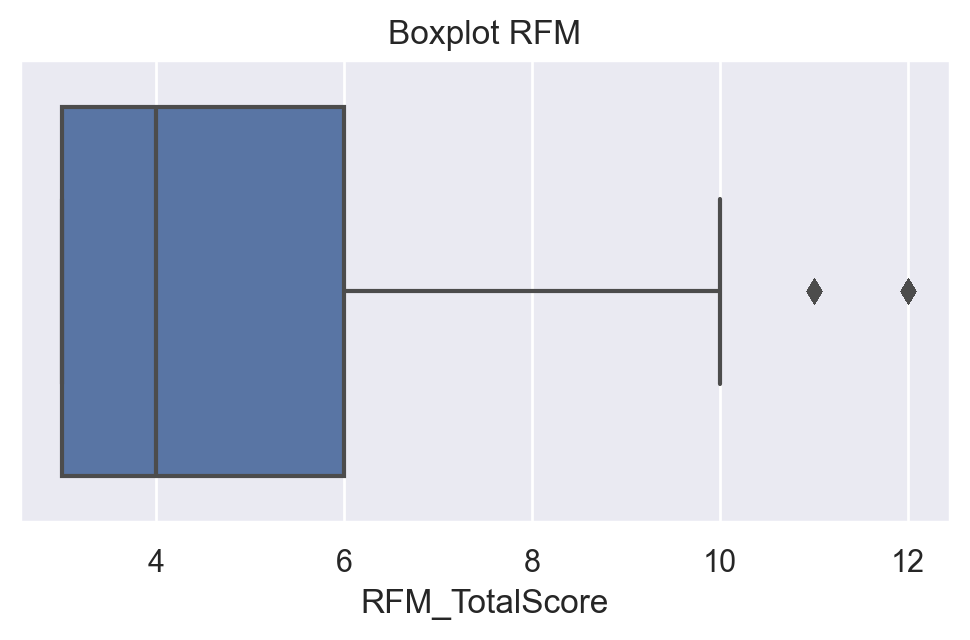

In [99]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=rfm_final['RFM_TotalScore'])

plt.title('Boxplot RFM')
plt.show()

In [101]:
median_recency = rfm_final['RFM_TotalScore'].median() #median or second quartil
median_recency

4.0

In [102]:
Q1 = rfm_final['RFM_TotalScore'].quantile(0.25)  # first quartil (25%)
Q3 = rfm_final['RFM_TotalScore'].quantile(0.75)  # third quartil (75%)
print('The first quartil is: ' +  str(Q1) + ' points')
print('The second quartil is: ' + str(Q3) + ' points')

The first quartil is: 3.0 points
The second quartil is: 6.0 points


In [103]:
IQR = Q3 - Q1
IQR

3.0

In [104]:
lim_inf = Q1 -1.5*IQR
max_sup = Q3 +1.5*IQR
print(lim_inf)
print(max_sup)

-1.5
10.5


In [105]:
outliers = rfm_final[(rfm_final['RFM_TotalScore'] < lim_inf)  | (rfm_final['RFM_TotalScore'] > max_sup)]
outliers

,CustomerID,Country,Recency,Rec.Segmentation,Frequency,Freq.Segmentation,Monetary,ScoreMonetary,RFM_TotalScore
1,12347.0,Iceland,2,4,7,4,4310.00,4,12
15,12362.0,Belgium,3,4,10,4,5226.23,4,12
54,12415.0,Australia,24,3,21,4,124914.53,4,11
55,12417.0,Belgium,3,4,9,4,3649.10,3,11
65,12428.0,Finland,26,3,9,4,7956.46,4,11
70,12433.0,Norway,1,4,7,4,13375.87,4,12
74,12437.0,France,2,4,18,4,4951.41,4,12
99,12471.0,Germany,2,4,30,4,19824.05,4,12
102,12474.0,Germany,17,3,18,4,7375.79,4,11
104,12476.0,Germany,16,3,11,4,6816.42,4,11


In [107]:
outliers_1 = len(outliers)
outliers_2 = round(len(outliers)/len(last_buy)*100, 2)

print('The quantity of outliers: '+ str(outliers_1))
print('The % of outliers is: ' +str(outliers_2) + '%')


The quantity of outliers: 299
The % of outliers is: 6.9%


In [108]:
X = rfm_final[['Recency', 'Frequency', 'Monetary']]

# normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

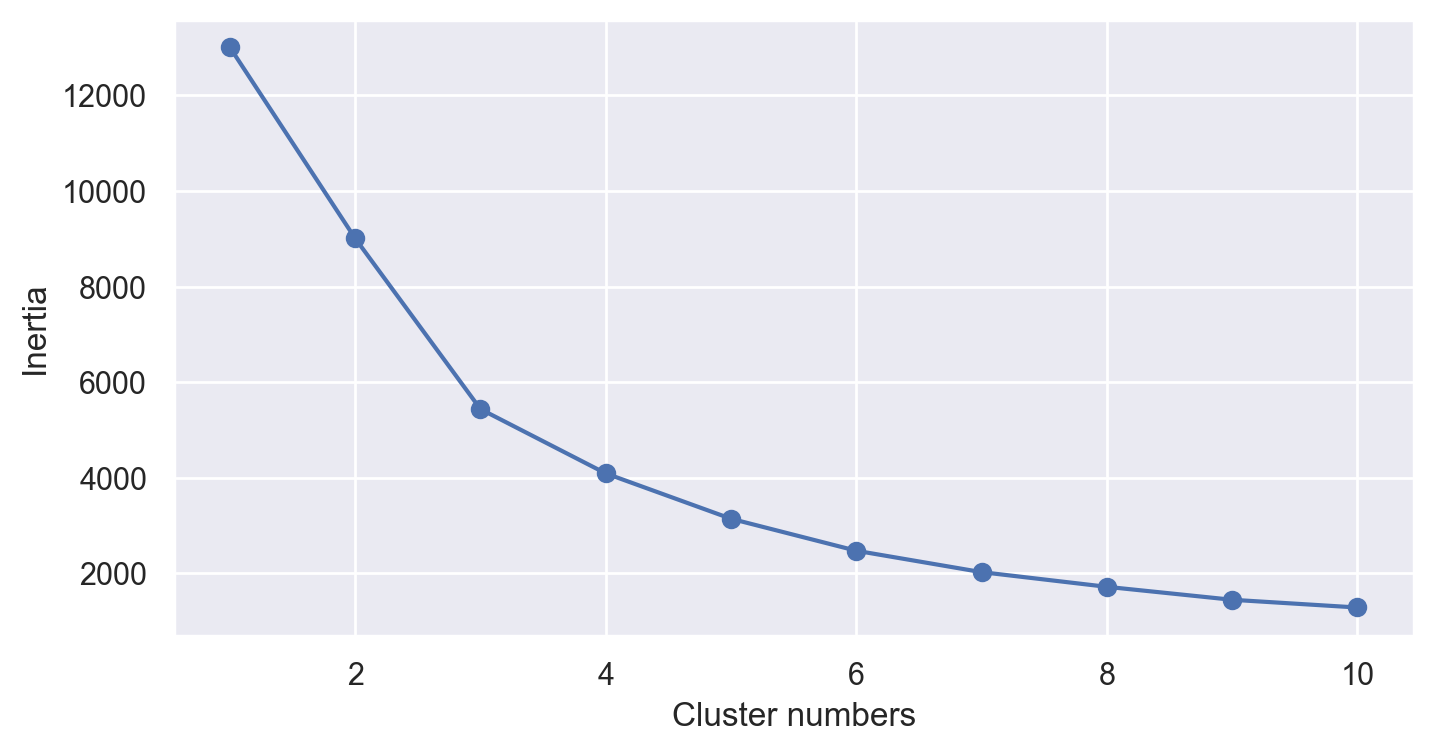

In [110]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Cluster numbers')
plt.ylabel('Inertia')

plt.show()

In [111]:
kmeans = KMeans(n_clusters=3, random_state=42)  # exemplo com 3 clusters
rfm_final['Cluster'] = kmeans.fit_predict(X_scaled)

In [112]:
rfm_final

,CustomerID,Country,Recency,Rec.Segmentation,Frequency,Freq.Segmentation,Monetary,ScoreMonetary,RFM_TotalScore,Cluster
0,12346.0,United Kingdom,326,1,1,1,77183.60,4,6,2
1,12347.0,Iceland,2,4,7,4,4310.00,4,12,0
2,12348.0,Finland,75,1,4,1,1797.24,1,3,0
3,12349.0,Italy,19,3,1,1,1757.55,1,5,0
4,12350.0,Norway,310,1,1,1,334.40,1,3,2
...,...,...,...,...,...,...,...,...,...,...
4330,18280.0,United Kingdom,278,1,1,1,180.60,1,3,2
4331,18281.0,United Kingdom,181,1,1,1,80.82,1,3,2
4332,18282.0,United Kingdom,8,4,2,2,178.05,1,7,0
4333,18283.0,United Kingdom,4,4,16,4,2094.88,2,10,0


In [113]:
rfm_final.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

,Recency,Frequency,Monetary
Cluster,,,
0,41.4,4.7,1856.6
1,6.0,66.5,85904.4
2,247.2,1.6,631.0


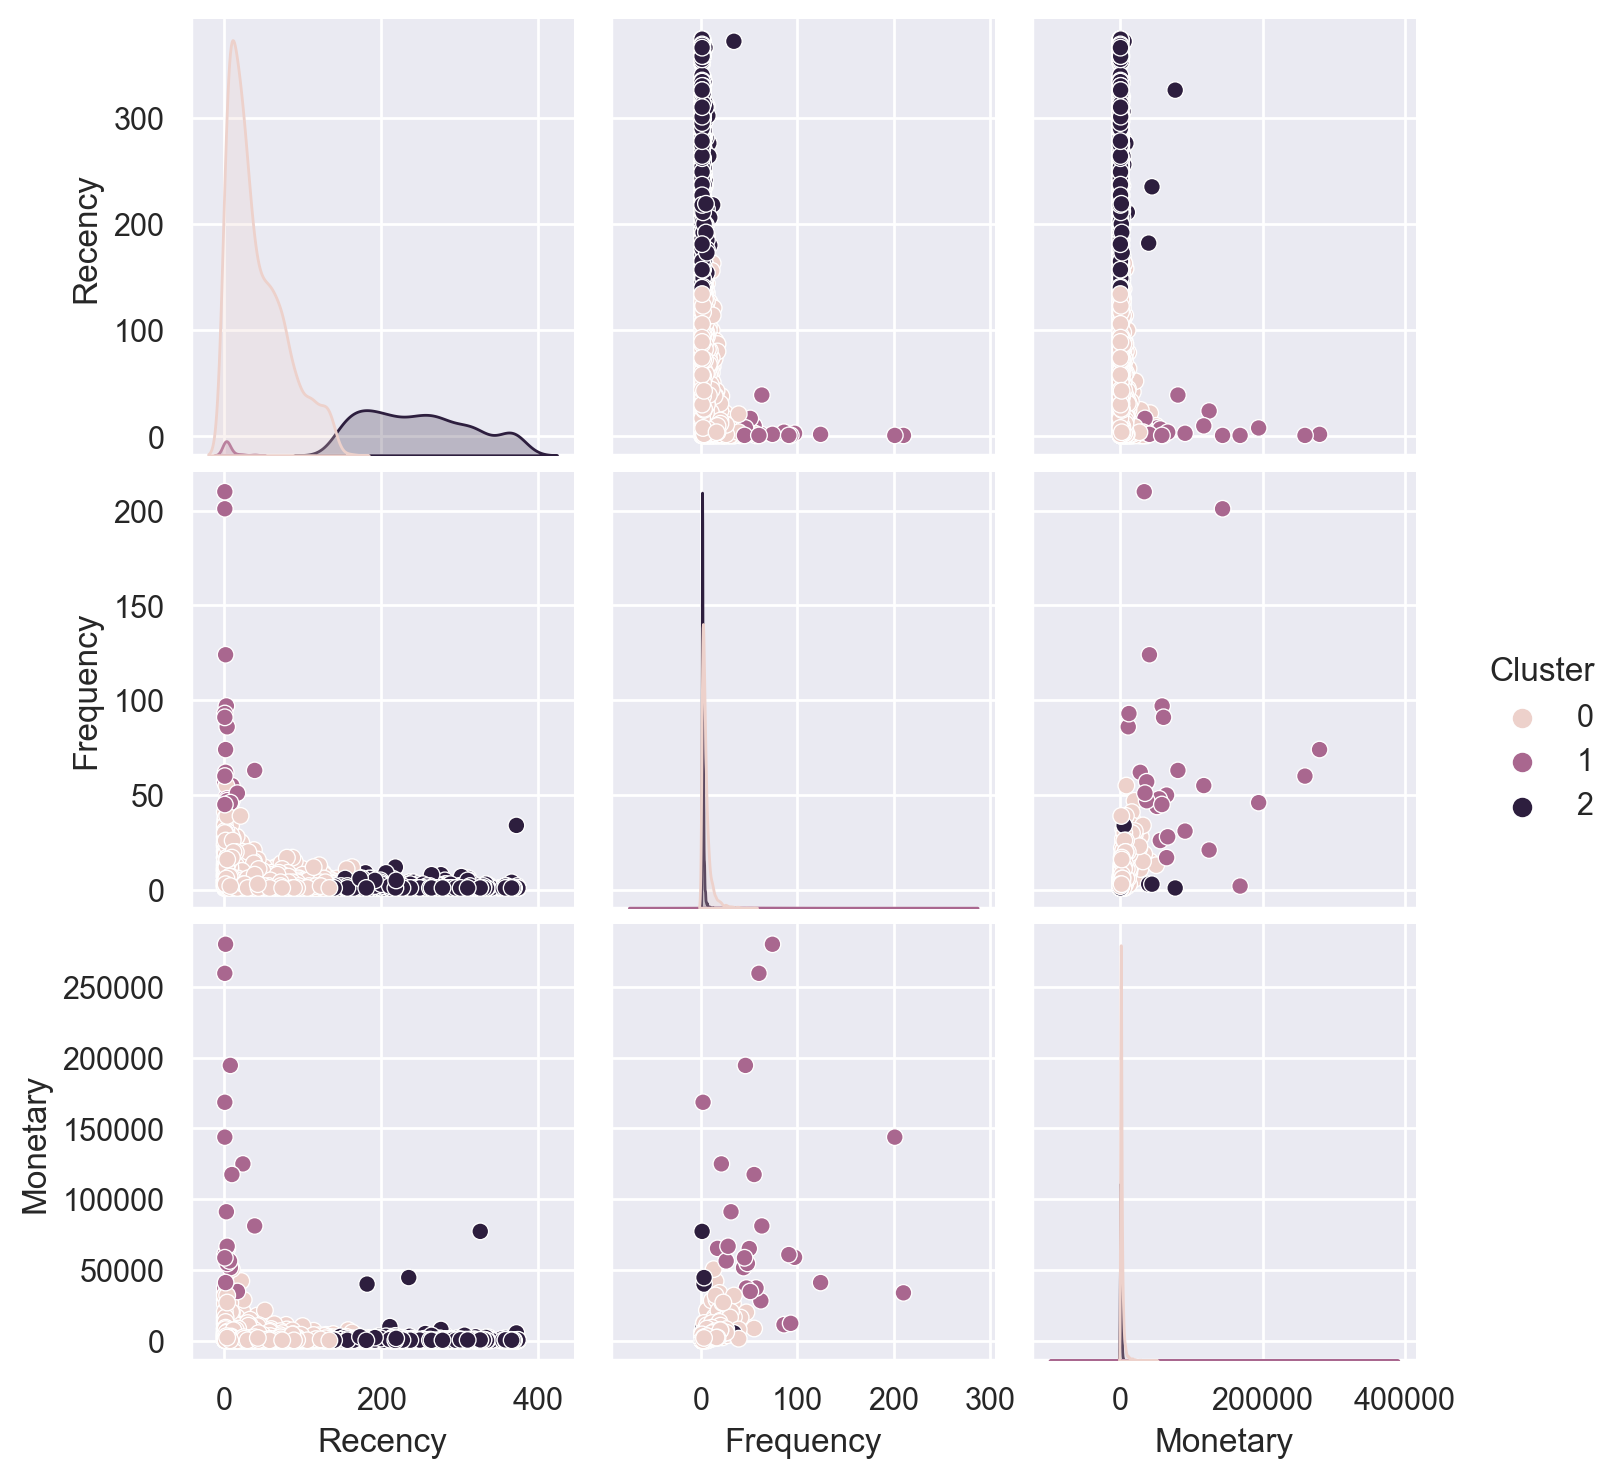

In [115]:
sns.pairplot(rfm_final, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'])
plt.show()